### HEART DISEASE PREDICTION USING LOGISTIC REGRESSION

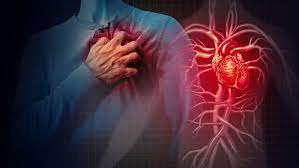

#### The term “heart disease” refers to several types of heart conditions, Heart disease is a general term that means that the heart is not working normally. Babies can be born with heart disease. This is called congenital heart disease. If people get heart disease later, it is called acquired heart disease. Most heart disease is acquired.

#### Here am taking the herat disease dataset from the kaggle. The dataset contains 'Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS','RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', and HeartDisease'. Am done this analyis using the Logistic regression(classification algorithm ) for predicting the person have haert disease or not. 
       '
       


### Importing Packages

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, roc_curve
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn import metrics

### Load data

In [31]:
data=pd.read_csv('heart.csv')
data.sample(6)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
716,67,M,ASY,120,237,0,Normal,71,N,1.0,Flat,1
36,65,M,ASY,140,306,1,Normal,87,Y,1.5,Flat,1
98,56,M,ASY,120,85,0,Normal,140,N,0.0,Up,0
857,53,F,ASY,130,264,0,LVH,143,N,0.4,Flat,0
222,48,F,NAP,120,195,0,Normal,125,N,0.0,Up,0
749,54,M,NAP,150,232,0,LVH,165,N,1.6,Up,0


 ### Explotary Data Analysis - EDA

In [32]:
data.shape

(918, 12)

In [94]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [34]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [35]:
data.isnull().mean()*100

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

### Univariant Analysis

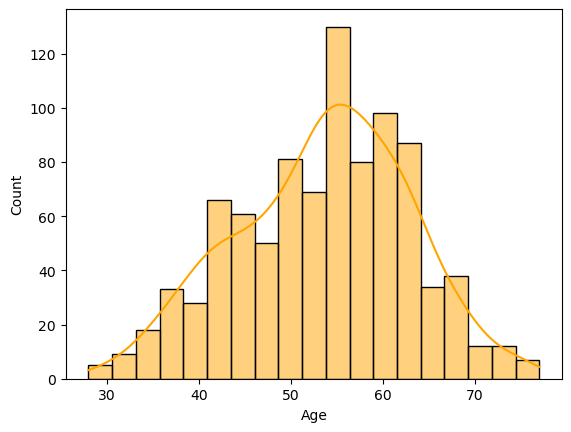

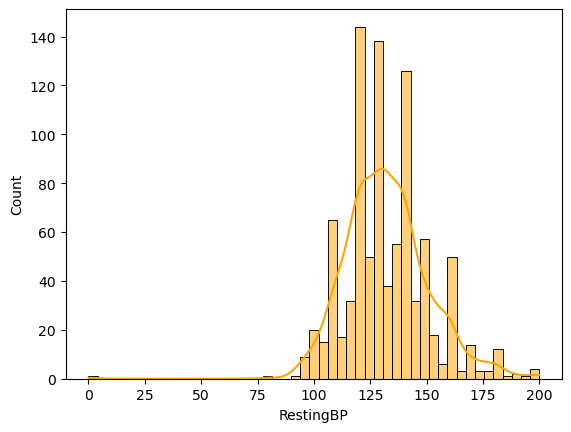

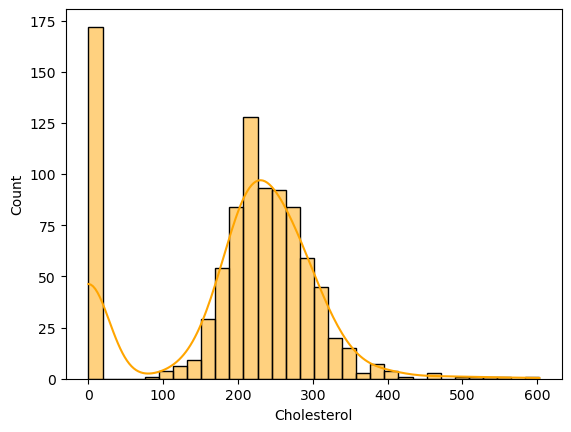

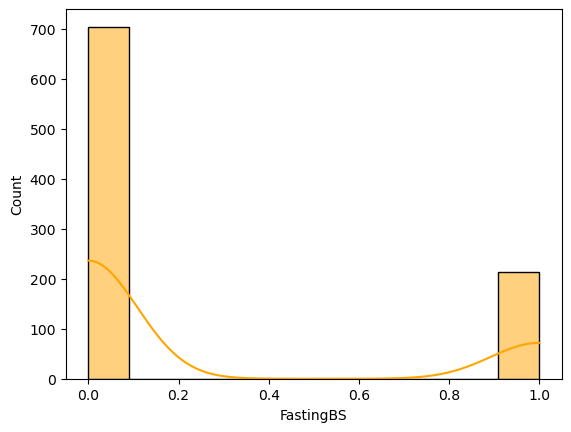

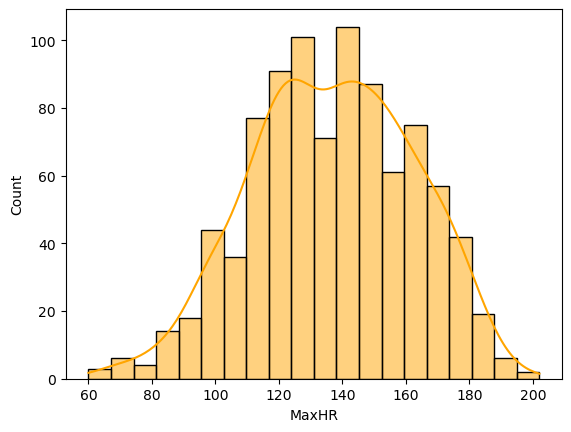

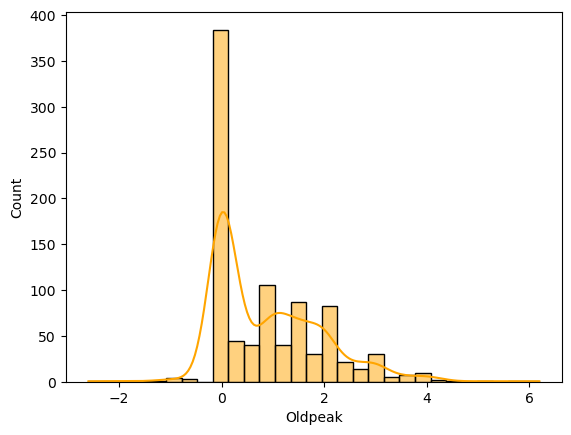

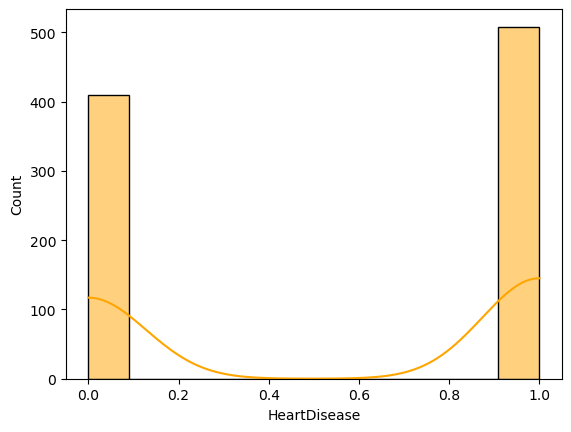

In [36]:
for column in data.columns:
    if data[column].dtype != "object":
        sns.histplot(data, x=data[column], kde=True, color="orange")
        plt.show()

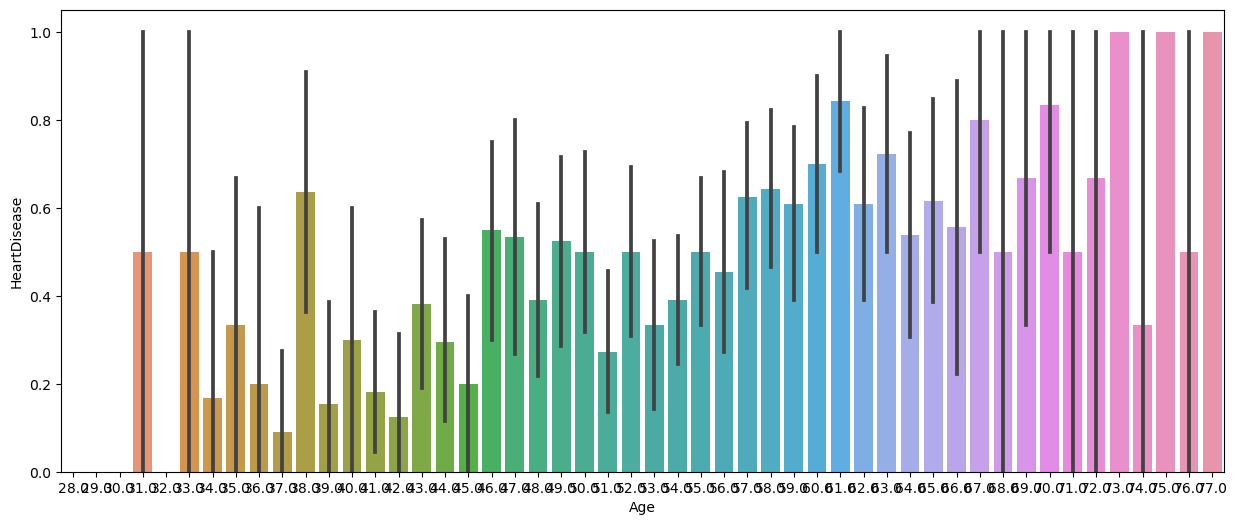

In [90]:
plt.figure(figsize=(15,6))
sns.barplot(data=data,x="Age",y="HeartDisease")
plt.show()

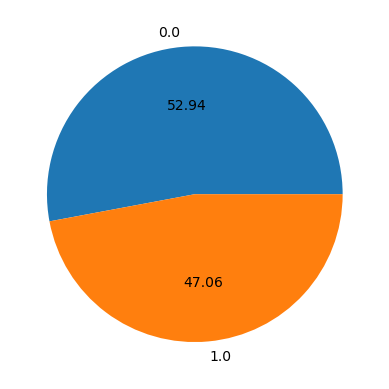

In [91]:
data.groupby("HeartDisease").size().plot(kind="pie",autopct='%0.2f')
plt.show()

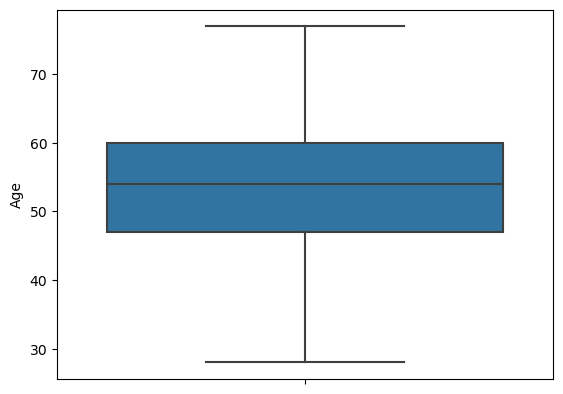

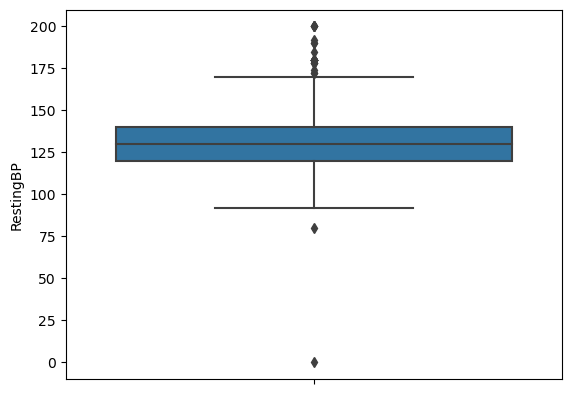

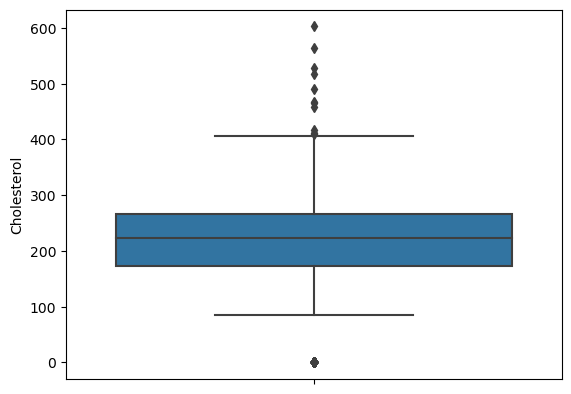

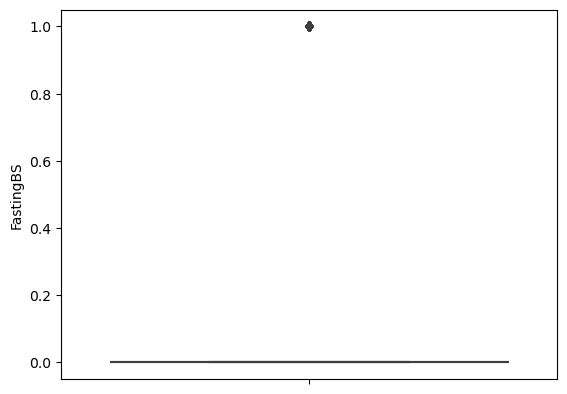

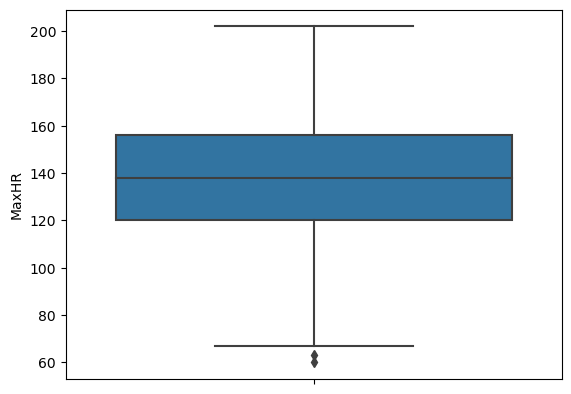

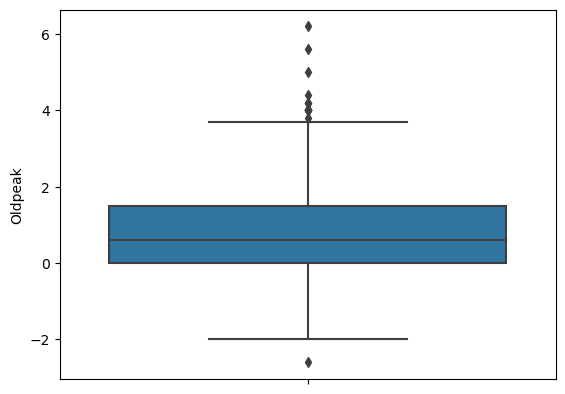

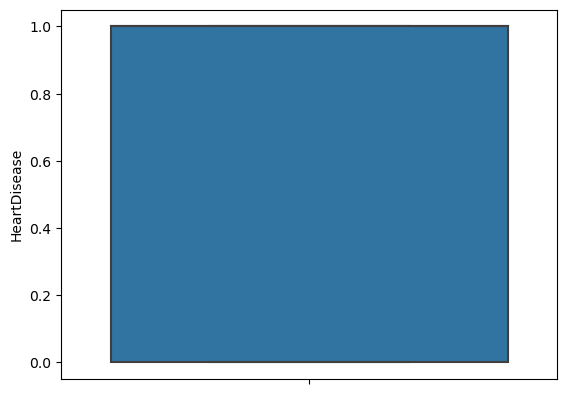

In [37]:
for column in data.columns:
    if data[column].dtype != "object":
        sns.boxplot(y = data[column])
        plt.show()

 #### After ploting the boxplot we can see that lot of outliers are present here. so we need to treat the outliers using the thre sigma rule or outlier treatment.Q1,Q3,IQR,UL,LL, are represents First Quartile,Third Quartile,Inter Quartile Range,Upper limit, and Lower limit 
    

In [38]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL

In [39]:
for column in data.columns:
    if data[column].dtype != "object":
        UL, LL = outlier_limit(data[column])
        data[column] = np.where((data[column]>UL) | (data[column]<LL),np.nan,data[column])

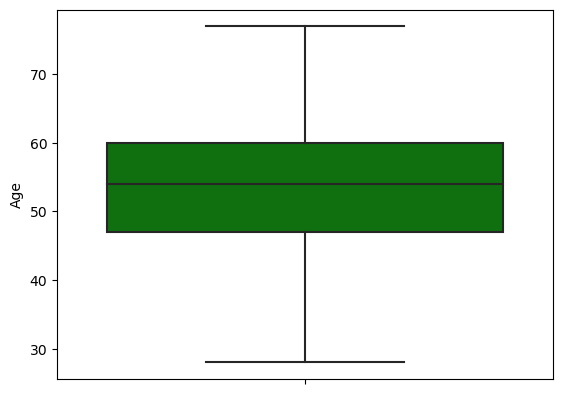

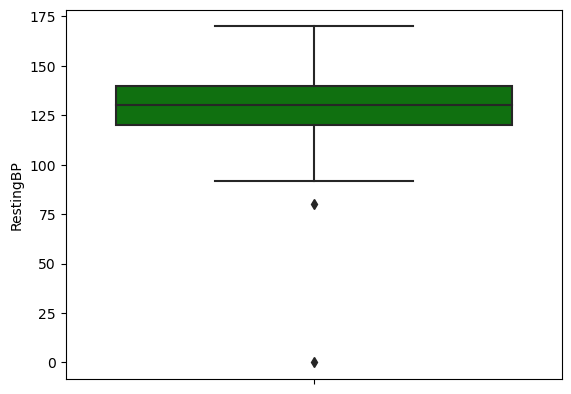

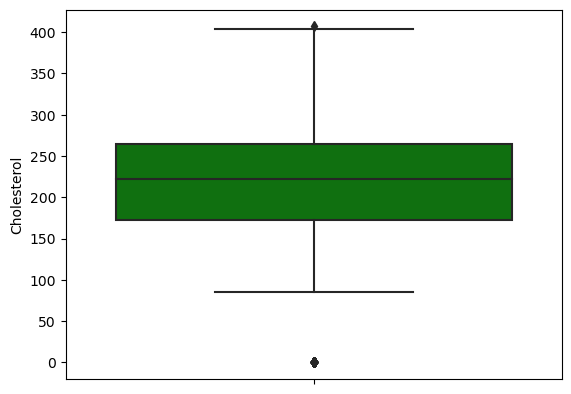

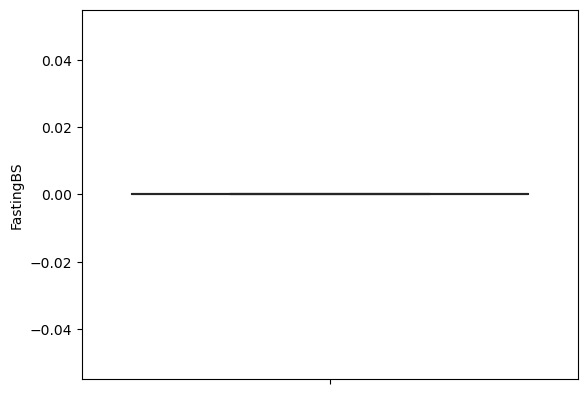

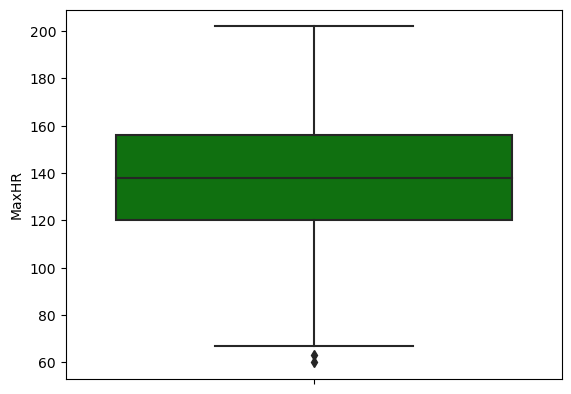

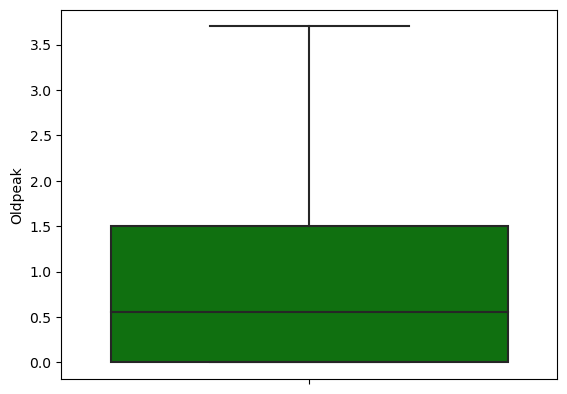

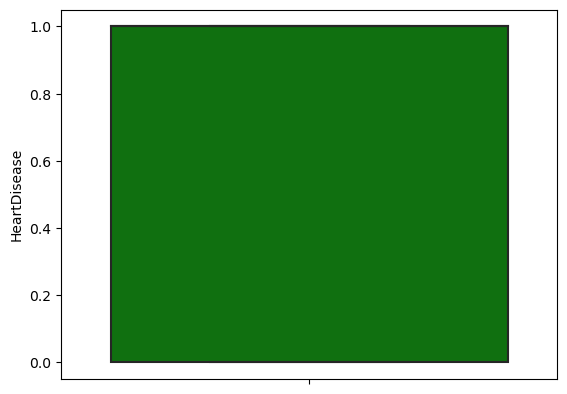

In [40]:
for column in data.columns:
    if data[column].dtype != "object":
        sns.boxplot(y = data[column], color="green")
        plt.show()

In [41]:
data.isnull().mean()*100

Age                0.000000
Sex                0.000000
ChestPainType      0.000000
RestingBP          2.832244
Cholesterol        1.198257
FastingBS         23.311547
RestingECG         0.000000
MaxHR              0.000000
ExerciseAngina     0.000000
Oldpeak            3.050109
ST_Slope           0.000000
HeartDisease       0.000000
dtype: float64

#### After outlier treatment some NaN values are occured in the data. so we are drop the NAN values using Dropna()

In [42]:
data.dropna(inplace=True)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             663 non-null    float64
 1   Sex             663 non-null    object 
 2   ChestPainType   663 non-null    object 
 3   RestingBP       663 non-null    float64
 4   Cholesterol     663 non-null    float64
 5   FastingBS       663 non-null    float64
 6   RestingECG      663 non-null    object 
 7   MaxHR           663 non-null    float64
 8   ExerciseAngina  663 non-null    object 
 9   Oldpeak         663 non-null    float64
 10  ST_Slope        663 non-null    object 
 11  HeartDisease    663 non-null    float64
dtypes: float64(7), object(5)
memory usage: 67.3+ KB


### Label encoding the catergorical variables

In [43]:
le = LabelEncoder()

In [45]:
cat_to_nue=['Sex','RestingECG','ChestPainType','ExerciseAngina','ST_Slope']
for i in cat_to_nue :
    if data[i].dtype=='object':
        data[i]=le.fit_transform(data[i])
        

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             663 non-null    float64
 1   Sex             663 non-null    int32  
 2   ChestPainType   663 non-null    int32  
 3   RestingBP       663 non-null    float64
 4   Cholesterol     663 non-null    float64
 5   FastingBS       663 non-null    float64
 6   RestingECG      663 non-null    int32  
 7   MaxHR           663 non-null    float64
 8   ExerciseAngina  663 non-null    int32  
 9   Oldpeak         663 non-null    float64
 10  ST_Slope        663 non-null    int32  
 11  HeartDisease    663 non-null    float64
dtypes: float64(7), int32(5)
memory usage: 54.4 KB


### Checking  correlation with the target values using heatmap

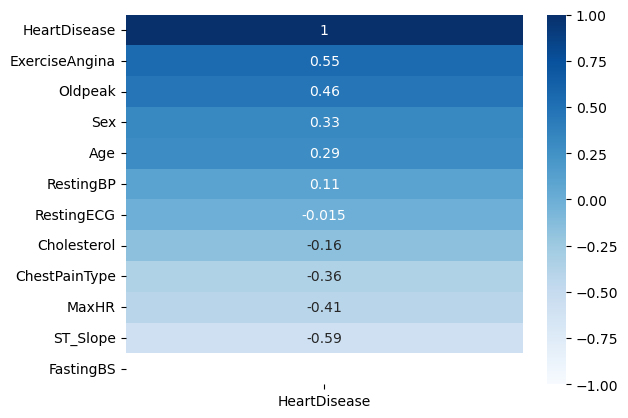

In [47]:
sns.heatmap(data.corr()[["HeartDisease"]].sort_values(by="HeartDisease", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Blues");

### Lets take only the columns with good correlation with the target

In [48]:
x=data[["ExerciseAngina","Oldpeak","Sex","Age"]].values

In [49]:
y=data[["HeartDisease"]].values

#### Feature Scaling

In [50]:
sc=StandardScaler()

In [51]:
x=sc.fit_transform(x)

#### Selecting the model using Cross Validation

In [58]:
models = {
    "LogisticRegression": LogisticRegression(),
    "Ridge":RidgeClassifier(),
        "LinearSVC":LinearSVC(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "RandomForestClassifier":RandomForestClassifier()
}

In [60]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="accuracy",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    print("Mean Score: ",np.mean(scores))
    print("*"*100)

cross validation model : LogisticRegression
Mean Score:  0.7903437358661238
****************************************************************************************************
cross validation model : Ridge
Mean Score:  0.7873586612392584
****************************************************************************************************
cross validation model : LinearSVC
Mean Score:  0.7903663500678426
****************************************************************************************************
cross validation model : DecisionTreeClassifier
Mean Score:  0.7133649932157395
****************************************************************************************************
cross validation model : GradientBoostingClassifier
Mean Score:  0.7797376752600633
****************************************************************************************************
cross validation model : AdaBoostClassifier
Mean Score:  0.7586612392582541
*************************************************

 #### From the cross validation score we find that LogisticRegression have the most accuracy value, So lets select the LogisticRegression for the modeling.

In [81]:
model= LogisticRegression()

#### Splitting the data set into training and testing

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0)

#### Model Accuracy

In [83]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
print("*"*60)

model trained with LogisticRegression()
Model accuracy on train is::  0.8150943396226416
Model accuracy on test is::  0.7142857142857143
confusion_matrix train is::  [[239  41]
 [ 57 193]]
confusion_matrix test is::  [[56 15]
 [23 39]]
Wrong Predictions made: 8732 / 17689
************************************************************


In [84]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"), dtype = int)


In [85]:
OUTPUT.sample(5)

,ACTUAL,PREDICTION
195,1,0
617,0,0
290,1,1
557,1,1
152,1,1


model used is :: LogisticRegression()


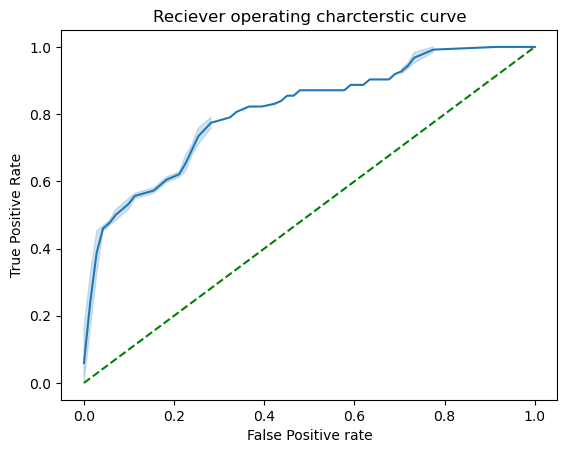

In [86]:
model.fit(x_train,y_train)
probs=model.predict_proba(x_test)
preds=probs[:,1]
fpr,tpr,thresold=metrics.roc_curve(y_test,preds)
roc_auc=metrics.auc(fpr,tpr)
print("model used is ::",model)
sns.lineplot(x=fpr,y=tpr)
plt.plot([0,1],[0,1],color="green",linestyle='--')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title('Reciever operating charcterstic curve')
plt.show()